In [2]:
import string
import spacy
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from heapq import nlargest
from wordcloud import WordCloud

In [3]:
nltk.download('punkt')  # для токенізації речень
nltk.download('stopwords')  # Завантажуємо список стоп-слів
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
nlp = spacy.load('en_core_web_sm')

text = "The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering. Because it has achieved significance within the past fifty years, Criteria Consideration G applies. Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA. Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions. She had the honor of being chosen as the Return to Flight vehicle after both the Challenger and Columbia accidents. Discovery was the first shuttle to fly with the redesigned SRBs, a result of the Challenger accident, and the first shuttle to fly with the Phase II and Block I SSME. Discovery also carried the Hubble Space Telescope to orbit and performed two of the five servicing missions to the observatory. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission. In addition, Discovery was vital to the construction of the International Space Station (ISS); she flew thirteen of the thirty-seven total missions flown to the station by a U.S. Space Shuttle. She was the first orbiter to dock to the ISS, and the first to perform an exchange of a resident crew. Under Criterion C, Discovery is significant as a feat of engineering. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.” Although her base structure followed a conventional aircraft design, she used advanced materials that both minimized her weight for cargo-carrying purposes and featured low thermal expansion ratios, which provided a stable base for her Thermal Protection System (TPS) materials. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System. As Hale stated, the Space Shuttle remains “the largest, fastest, winged hypersonic aircraft in history,” having regularly flown at twenty-five times the speed of sound."

doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)

['The', 'Orbiter', 'Discovery', ',', 'OV-103', ',', 'is', 'considered', 'eligible', 'for', 'listing', 'in', 'the', 'National', 'Register', 'of', 'Historic', 'Places', '(', 'NRHP', ')', 'in', 'the', 'context', 'of', 'the', 'U.S.', 'Space', 'Shuttle', 'Program', '(', '1969', '-', '2011', ')', 'under', 'Criterion', 'A', 'in', 'the', 'areas', 'of', 'Space', 'Exploration', 'and', 'Transportation', 'and', 'under', 'Criterion', 'C', 'in', 'the', 'area', 'of', 'Engineering', '.', 'Because', 'it', 'has', 'achieved', 'significance', 'within', 'the', 'past', 'fifty', 'years', ',', 'Criteria', 'Consideration', 'G', 'applies', '.', 'Under', 'Criterion', 'A', ',', 'Discovery', 'is', 'significant', 'as', 'the', 'oldest', 'of', 'the', 'three', 'extant', 'orbiter', 'vehicles', 'constructed', 'for', 'the', 'Space', 'Shuttle', 'Program', '(', 'SSP', ')', ',', 'the', 'longest', 'running', 'American', 'space', 'program', 'to', 'date', ';', 'she', 'was', 'the', 'third', 'of', 'five', 'orbiters', 'built', 'b

In [5]:
tokens = word_tokenize(text)
sentences = sent_tokenize(text)
sentences

['The Orbiter Discovery, OV-103, is considered eligible for listing in the National Register of Historic Places (NRHP) in the context of the U.S. Space Shuttle Program (1969-2011) under Criterion A in the areas of Space Exploration and Transportation and under Criterion C in the area of Engineering.',
 'Because it has achieved significance within the past fifty years, Criteria Consideration G applies.',
 'Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles constructed for the Space Shuttle Program (SSP), the longest running American space program to date; she was the third of five orbiters built by NASA.',
 'Unlike the Mercury, Gemini, and Apollo programs, the SSP’s emphasis was on cost effectiveness and reusability, and eventually the construction of a space station.',
 'Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to

In [7]:
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation + "”“" + r"\n"
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~”“\n


In [8]:
word_frequencies = {}

for word in doc:
  if word.text.lower() not in stop_words and word.text.lower() not in punctuations:
    if word.text not in word_frequencies.keys():
      word_frequencies[word.text] = 1
    else:
      word_frequencies[word.text] += 1

select_length = int(len(sentences))
summary = nlargest(select_length, word_frequencies, key = word_frequencies.get)
print(summary)

['Space', 'first', 'Discovery', 'Shuttle', 'orbiter', 'Criterion', 'missions', 'space', 'five', 'flew', 'also', 'fly', 'reusable', 'U.S.', 'Program', 'C']


In [9]:
sorted_dict = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict)

{'Space': 10, 'first': 10, 'Discovery': 7, 'Shuttle': 6, 'orbiter': 6, 'Criterion': 4, 'missions': 4, 'space': 3, 'five': 3, 'flew': 3, 'also': 3, 'fly': 3, 'reusable': 3, 'U.S.': 2, 'Program': 2, 'C': 2, 'significant': 2, 'vehicles': 2, 'SSP': 2, 'orbiters': 2, 'construction': 2, 'station': 2, 'thirty': 2, 'times': 2, 'twenty': 2, 'Challenger': 2, 'shuttle': 2, 'two': 2, 'ISS': 2, 'flown': 2, 'engineering': 2, 'Hale': 2, 'winged': 2, 'hypersonic': 2, 'cargo': 2, 'carrying': 2, 'base': 2, 'aircraft': 2, 'materials': 2, 'featured': 2, 'System': 2, 'TPS': 2, 'Orbiter': 1, 'OV-103': 1, 'considered': 1, 'eligible': 1, 'listing': 1, 'National': 1, 'Register': 1, 'Historic': 1, 'Places': 1, 'NRHP': 1, 'context': 1, '1969': 1, '2011': 1, 'areas': 1, 'Exploration': 1, 'Transportation': 1, 'area': 1, 'Engineering': 1, 'achieved': 1, 'significance': 1, 'within': 1, 'past': 1, 'fifty': 1, 'years': 1, 'Criteria': 1, 'Consideration': 1, 'G': 1, 'applies': 1, 'oldest': 1, 'three': 1, 'extant': 1, 'c

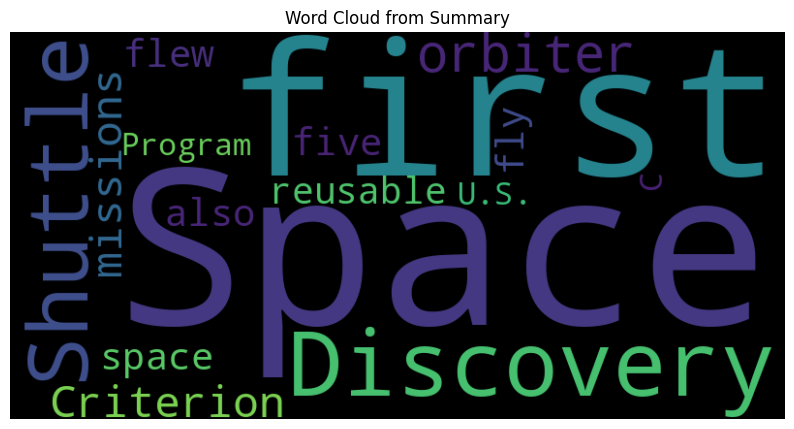

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color='black', max_words=len(summary)).generate_from_frequencies(word_frequencies)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud from Summary")
plt.axis('off')
plt.show()

In [11]:
sentence_tokens = list(doc.sents)

sentence_scores = {}

for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores:
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]

sorted_dict = dict(sorted(sentence_scores.items(), key=lambda item: item[1], reverse=True))
sorted_dict

{Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.: 47,
 Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System.: 42,
 The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield.: 38,
 She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission.: 35,
 According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.”: 35,
 Under Criterion A, Discovery is significant as the oldest of the three extant orbiter vehicles c

In [12]:
summary = nlargest(5, sentence_scores, key = sentence_scores.get)
print("Top 5:")
for i, y in enumerate(summary, 1):
  print(f'{i}. {y}')

Top 5:
1. Including her maiden voyage (launched August 30, 1984), Discovery flew to space thirty-nine times, more than any of the other four orbiters; she was also the first orbiter to fly twenty missions.
2. Other notable engineering achievements of the orbiter included the first reusable orbital propulsion system, and the first two-fault-tolerant Integrated Avionics System.
3. The Space Shuttle orbiter also featured the first reusable TPS; all previous spaceflight vehicles had a single-use, ablative heat shield.
4. She flew the first and last dedicated Department of Defense (DoD) missions, as well as the first unclassified defense-related mission.
5. According to Wayne Hale, a flight director from Johnson Space Center, the Space Shuttle orbiter represents a “huge technological leap from expendable rockets and capsules to a reusable, winged, hypersonic, cargo-carrying spacecraft.”
